# Modeling | Twitter ( HK NLP Project )

# Table of Contents<a id='#home'></a>
* [5.0 Modeling](#modeling)
  * [5.1 Contents](#contents)
    * [5.1.1 Libraries & Code](#eda_lib_code)
    * [5.1.2 DataFrame Imports](#eda_dfs)
  * [5.2 Setting the Stage for Clustering](#ssfc)
    * [5.2.1 pyLDAvis](#eda_pyLDAvis)
      * [5.2.1.1 Lemmatization](#eda_lemming)
      * [5.2.1.2 Stop Word Removal](#eda_swr)
      * [5.2.1.2 Bag of Words](#eda_bow)
      * [5.2.1.2 LdaModeling](#eda_ldam)   
    * [5.2.2 Bigrams](#eda_bgrams)
    * [5.2.3 Stop Words Update](#eda_sw_update)
    * [5.2.4 TfidF](#eda_gen_tfidf)
    * [5.2.5 Coherence Score](#eda_cscore)
    * [5.2.6 Words in Topics](#eda_words_in_t)
    * [5.2.7 Topics Distribution](#eda_top_dist)
    * [5.2.8 Reading Between the Lines](#eda_between)
      * [5.2.8.1 RBL Topic 1](#eda_rdl_1)
      * [5.2.8.2 RBL Topic 2](#eda_rdl_2)
      * [5.2.8.3 RBL Topic 3](#eda_rdl_3)
      * [5.2.8.4 RBL Topic 4](#eda_rdl_4)
  * [5.3 Project Summary](#p_summary)


# **5.1 Contents**<a id='contents'></a>

Here we will do Modeling **with the goal of setting up Clusters**. Based on what we could initially see from EDA, **we will examine different ideas whereby we can potentially cluster Topics** successfully to give us a clearer idea of what Topics were Tweeted.

As a reminder, **we have two (2) main data frames to start**; notably:
   * **Main |** The back end of cleaned data frame.
     * `df`
   * **TfidfVectorizer |** df_main with TfidfVectorizer.
     * `df_tweets_tfidf`

We also have **two (2) supporting data frames** which we may use if required:
   * **Positive Tweets |** Tweets with a Sentiment Comp Score above +0.53.
     * `tw_above`
   * **Negative Tweets |** Tweets with a Sentiment Comp Score below -0.36.
     * `tw_below`


**Our overall findings will be found in the section below**:
   * [2.3 Project Summary](#p_summary)


In the **process of Clustering the data will be passed through the below before the it gets to pyLDAvis**:

   * Stop Word Re-Removal, 
   * Lemmatization & 
   * Bag of Words 

Once complete, **pyLDAvis will help better visualize potential clustering.** Please note, **for those looking at this on GitHub**, my apologies but **pyLDAvis doesn't show up there. You will see the output in the: 
   * Report &
   * Presentations

<a id='eda_lib_code'></a>**Libraries & Code**

In [1]:
# Main Imports
import os
import sys
import json
import glob
import statistics
from scipy.stats import skew
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
%matplotlib inline
import datetime
import time
import warnings
warnings.filterwarnings("ignore")
%reload_ext watermark
import enchant 
import wget
import zipfile
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# NLP Imports
import re
import string
import requests
import urllib.request
import nltk
import pickle
import emoji
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary, MmCorpus
from better_profanity import profanity
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from spacy.language import Language


from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import spacy
import en_core_web_sm
nltk.download("stopwords")
stop = stopwords.words('english')
stops =  set(stopwords.words('english')+['com'])
stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

results = Counter()

%watermark -d -t -v -p pandas

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.10.0

pandas: 1.2.4



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id='eda_dfs'></a>**DataFrame Imports** | Here we will import the data frames built during Data Wrangling.

In [2]:
cd

C:\Users\rands


In [3]:
df = pd.read_excel('./_Capstone_Two_NLP/data/_twitter/_post_eda/df.xlsx')
df = df.reset_index()
df = df.drop(columns=['Unnamed: 0','index'])

In [4]:
# checking to see if it was pulled in correctly
df.head(2)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos,tweet_stemmed,tweet_lemmatized,#_words_tweet,#_hashtags
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks speaking us #fridaysforfreedom #fightfo...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,0.000,0.707,0.293,"['thank', 'speak', 'us', 'fridaysforfreedom', ...","['Thanks', 'speaking', 'u', '#fridaysforfreedo...",5,2
1,#FightForHongKong,2020-08-25,peterhjorth_ddp,How stop China Hong Kong. Read new report Dani...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000,"['stop', 'china', 'hong', 'kong', 'read', 'new...","['How', 'stop', 'China', 'Hong', 'Kong.', 'Rea...",25,13


In [5]:
df_tweets_tfidf = pd.read_pickle("./_Capstone_Two_NLP/data/_twitter/_post_eda/df_tweets_tfidf.pkl")

In [6]:
# checking to see if it was pulled in correctly
df_tweets_tfidf.head(1)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,...,world,would,xijinping,year,years,yes,yet,you,young,your
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks speaking us #fridaysforfreedom #fightfo...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
tw_above = pd.read_pickle("./_Capstone_Two_NLP/data/_twitter/_post_eda/tw_above.pkl")

In [8]:
tw_below = pd.read_pickle("./_Capstone_Two_NLP/data/_twitter/_post_eda/tw_below.pkl")

In [9]:
#to confirm no cells in the main two are null
print('Main_df Got Nulls? |',df.isnull().values.any(),'\n'
     'Tfidf Got Nulls?   |',df_tweets_tfidf.isnull().values.any()
     )

Main_df Got Nulls? | False 
Tfidf Got Nulls?   | False


**Code Defined** | We will display the Code Defined for the `df` only as the variables remain consistent throughout.

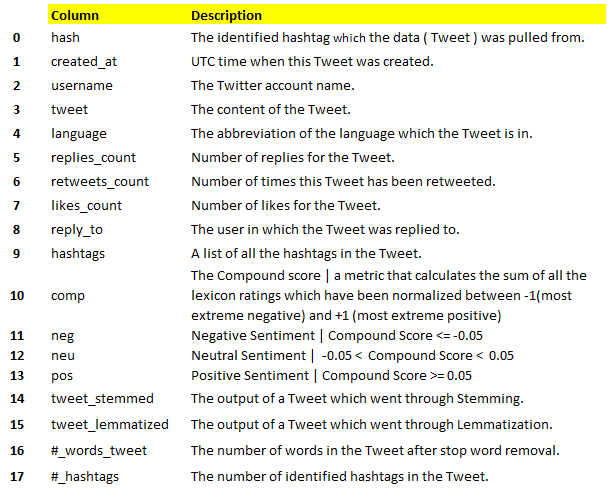

**We will run the `describe` function on the `main_df` only** as the additional numbers for `df_tweets_tfidf` are numerous.

In [10]:
df.describe()

,replies_count,retweets_count,likes_count,comp,neg,neu,pos,#_words_tweet,#_hashtags
count,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000
mean,0.570889,6.148669,11.258169,0.095108,0.102678,0.728057,0.169265,14.371187,3.267876
std,13.535243,109.366725,173.143553,0.534434,0.124905,0.164872,0.161290,8.002316,2.637373
min,0.000000,0.000000,0.000000,-0.990100,0.000000,0.078000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,-0.361200,0.000000,0.616000,0.000000,8.000000,1.000000
50%,0.000000,0.000000,1.000000,0.077200,0.065000,0.725000,0.144000,13.000000,3.000000
75%,0.000000,1.000000,2.000000,0.539900,0.179000,0.835000,0.270000,20.000000,4.000000
max,3014.000000,16023.000000,32479.000000,0.998900,0.897000,1.000000,0.922000,65.000000,26.000000


# **5.3 Setting the Stage for Clustering**<a id='ssfc'></a>

<a id='eda_pyLDAvis'></a>**pyLDAvis** | Before we begin, we will provide a brief explaination of the tool for clustering which is pyLDAvis:
   * pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

To reiterate, **for those looking at this on GitHub**, my apologies but **pyLDAvis doesn't show up there. You will see the output in the**: 
   * Report &
   * Presentations


**Setting up a Seperate Data Frame**

In [12]:
df_cluster = df.copy()
#lowercasing the words in the tweets
df_cluster['tweet'] = df_cluster['tweet'].str.lower()
#Let’s get rid of them using regular expressions
#removing the hashtags from the tweets
df_cluster['tweet'] = df_cluster['tweet'].str.replace("#[A-Za-z0-9]+","")
#removing punctuation
df_cluster['tweet'] = df_cluster['tweet'].str.replace('[^\w\s]','')
#removing numbers
df_cluster['tweet'] = df_cluster['tweet'].str.replace('\d+', '')
#removing Chinese characters
df_cluster['tweet'] = df_cluster['tweet'].str.replace(r'[^\x00-\x7F]+', '')
df_cluster['tweet'].head(2)

<>:8: DeprecationWarning: invalid escape sequence \w
<>:10: DeprecationWarning: invalid escape sequence \d
<>:8: DeprecationWarning: invalid escape sequence \w
<>:10: DeprecationWarning: invalid escape sequence \d
<ipython-input-12-a9a20fd6bc07>:8: DeprecationWarning: invalid escape sequence \w
  df_cluster['tweet'] = df_cluster['tweet'].str.replace('[^\w\s]','')
<ipython-input-12-a9a20fd6bc07>:10: DeprecationWarning: invalid escape sequence \d
  df_cluster['tweet'] = df_cluster['tweet'].str.replace('\d+', '')


0                                 thanks speaking us  
1    how stop china hong kong read new report danis...
Name: tweet, dtype: object

In [13]:
len(df_cluster)

163699

In [14]:
df_cluster['tweet'].isnull().sum()

1

In [15]:
is_NaN = df_cluster.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_cluster[row_has_NaN]
rows_with_NaN

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos,tweet_stemmed,tweet_lemmatized,#_words_tweet,#_hashtags
132118,#freehongkong,2020-07-23,spqrdawg,NaN,0,0,0,[],"['freehongkong', 'freehongkong', 'chinesecommu...",0.0,0.0,1.0,0.0,"['', 'state', 'sponsor', 'media', 'freehongkon...","['=', 'STATE', 'SPONSORED', 'MEDIA', '#FreeHon...",7,3


In [16]:
df_cluster = df_cluster.drop([132118])

In [17]:
df_cluster['tweet'].isnull().sum()

0

<a id='eda_lemming'></a>**Lemmatization**

In [18]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(df_cluster['tweet'])
print(lemmatized_texts[0][0:90])

thank speak


That doesn't mean much; it's just confirmation that it worked & it allows a topic model to categorize things easily.

<a id='eda_swr'></a>**Stop Word Removal** | Reduce text to individual words & double confirm stop words have been removed.

In [19]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True) #deacc is a boolean for accent words; may have so it's true
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print(data_words[1][0:20])

['how', 'stop', 'china', 'hong', 'kong', 'read', 'new', 'report', 'danish', 'think', 'tank', 'cipo']


We now have stop words removed; thus a much cleaner text. Lemmization isn't perfect so words like `cipo` doesn't make sense unless it's referring to the Canadian Intellectual Property Office.

Nevertheless, we have a clean set to build a topic model.

<a id='eda_bow'></a>**Bag of Words**

In [20]:
# this allows us to have a few key pieces of data
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text) #bow = bag of words
    corpus.append(new)

print (corpus[1][0:20])

[(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


That list of arrays doesn't make much sense to us humans so I will show you what the first array means for reference.

In [21]:
word = id2word[[1][:][0]]
print(word)

thank


<a id='eda_ldam'></a>**LdaModeling** | We now have a dictionary to lookup words & their frequency. We will start with 30 topics.

In [22]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=30,    # this may result for a lot in the "mistake" topic
                                           random_state=100, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**pyLDAvis** | Visualizing the Tweet Data

In [23]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
22    -0.528318  0.099111       1        1  8.980569
26     0.175912 -0.499128       2        1  8.414656
11     0.444155  0.221164       3        1  8.260152
0      0.363529  0.349050       4        1  7.619266
8      0.501289 -0.172519       5        1  6.468152
19    -0.016346 -0.483281       6        1  6.256667
4     -0.359074  0.377932       7        1  5.214642
3      0.502521  0.057268       8        1  5.094746
17    -0.436208 -0.290033       9        1  5.057150
9     -0.461398 -0.069975      10        1  4.423182
14    -0.290142  0.352982      11        1  4.194474
16    -0.162341 -0.454565      12        1  3.943099
27    -0.252928 -0.351453      13        1  3.470793
15     0.376842 -0.020629      14        1  2.761639
21     0.070830  0.498319      15        1  2.725623
18     0.368042 -0.317342      16        1  2.438199
5      0.259000 -0.241562      17        1  2.429650
20    -0.370359  0.141846      18        1  2.178379
13    -0.326450 -0.180012      19        1  2.104834
29     0.127035  0.381753      20        1  1.998451
24     0.207838  0.264694      21        1  1.629753
10    -0.103506  0.275672      22        1  1.574238
1     -0.093261  0.430136      23        1  1.254001
25     0.108454 -0.322598      24        1  1.035579
6      0.052404  0.028838      25        1  0.245686
28    -0.051864 -0.065145      26        1  0.128932
12    -0.026390 -0.002652      27        1  0.024372
7     -0.026426 -0.002622      28        1  0.024372
23    -0.026417 -0.002628      29        1  0.024372
2     -0.026422 -0.002624      30        1  0.024372, topic_info=       Term          Freq         Total Category  logprob  loglift
81      amp  45834.000000  45834.000000  Default  30.0000  30.0000
5      hong  58287.000000  58287.000000  Default  29.0000  29.0000
300  police  52150.000000  52150.000000  Default  28.0000  28.0000
7      kong  55548.000000  55548.000000  Default  27.0000  27.0000
50       hk  27729.000000  27729.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
20     here      0.011587   1251.437354  Topic30 -10.3456  -3.2704
21     want      0.011587  15445.620761  Topic30 -10.3456  -5.7834
22    world      0.011587  28779.289168  Topic30 -10.3456  -6.4058
24    japan      0.011587    153.298202  Topic30 -10.3456  -1.1707
29     form      0.011587    589.886455  Topic30 -10.3456  -2.5183

[1305 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
278      19  0.995676     affect
147       1  0.999523      allow
371      20  0.999748    already
365      13  0.999762       also
81       11  0.999961        amp
...     ...       ...        ...
33        1  0.991975       wong
22        6  0.999920      world
177       6  0.998423  worldwide
137       5  0.999771       year
102      13  0.998188  yesterday

[239 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[23, 27, 12, 1, 9, 20, 5, 4, 18, 10, 15, 17, 28, 16, 22, 19, 6, 21, 14, 30, 25, 11, 2, 26, 7, 29, 13, 8, 24, 3])

To reiterate, **for those looking at this on GitHub**, my apologies but **pyLDAvis doesn't show up there. You will see the output in the: 
   * Report &
   * Presentations

For our first round with 30 topics, we will outline what is observed:
   * The area of each circle represents the importance of the topic relative to the corpus
   * We have 30 Topics thus 30 circles
   * The distance between the center of the circles indicates the similarity between the topics
     * You can see that Topics 3 & 4 overlap as well as 7 & 11 indicating these topics are more similar to each other respectively
   * Topics 25+ are in the center & small in size suggesting they don't have much importance.
   * On the right side, the Top 30 identified words for each Topic are outlined


<a id='eda_bgrams'></a>**Bigrams** | There are a lot of words that aren't really words with a lot of meaning or helping us much. Therefore, we should create a Removal List to make adjustments to the code & Pre-Processing to help these Topics to harmonize better. We will hold on that until we see how **Bigrams** & **Trigrams** (a collection of words) present clusters which may be an even better approach.

In [24]:
bigrams_phrases = gensim.models.Phrases(data_words,min_count=5, threshold=50)
trigrams_phrases = gensim.models.Phrases(bigrams_phrases[data_words], threshold=50)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(trigrams_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

In [25]:
print(data_bigrams_trigrams[8])

['jpn', 'thank', 'japan', 'brother_sister']


In [26]:
df['tweet'][8]

'_JPN Thank japan brother sister!! #freehongkong #fightforhongkong'

Let's start working with gensim & TfidF

In [27]:
# we will run the same on data_bigrams_trigrams
id2word = corpora.Dictionary(data_bigrams_trigrams)

# making a single object from data_bigrams_trigrams making it simplier going forwards
texts = data_bigrams_trigrams

# convert all this to a bag of words corpus
corpus = [id2word.doc2bow(text) for text in texts]

tfidf =  TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# goes through & looks for words that occur with the low_value threshold; then presumes that's ubiquitous & provides little value
# we will note that come will be identified here that do provide value but we can manually remove words dropped that are valuable after
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

#reassign        
corpus[i] = new_bow


As our previous round of LdaModel conveyed that +25 topics didn't show much, **we will limit the new pyLDAvis to 20.**

In [28]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=20,    # this may result for a lot in the "mistake" topic
                                           random_state=100, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**Visualizing the Data**

In [29]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.302098  0.370213       1        1  12.857433
2      0.243047 -0.449535       2        1  10.073995
11    -0.252502 -0.105519       3        1   9.894564
13    -0.094935  0.489738       4        1   7.495751
8      0.333566 -0.265966       5        1   6.937073
12     0.431944 -0.116837       6        1   5.428329
4      0.124791  0.429359       7        1   5.369059
14    -0.229398 -0.422729       8        1   5.255415
1     -0.465174  0.179721       9        1   5.017527
10     0.355496  0.197528      10        1   4.437221
19     0.488237  0.069034      11        1   4.184643
9     -0.015969  0.259791      12        1   4.032710
3     -0.373914 -0.266471      13        1   3.290766
6     -0.273685  0.353862      14        1   3.195906
7      0.024246 -0.443921      15        1   3.162511
17    -0.259959  0.148239      16        1   2.997775
18    -0.043988 -0.290510      17        1   2.923940
16    -0.465825 -0.064297      18        1   2.151188
5      0.132040 -0.077775      19        1   1.270430
15     0.039882  0.006077      20        1   0.023765, topic_info=               Term         Freq         Total Category  logprob  loglift
5              hong  64179.00000  64179.000000  Default  30.0000  30.0000
290          police  40352.00000  40352.000000  Default  29.0000  29.0000
7              kong  61162.00000  61162.000000  Default  28.0000  28.0000
78              amp  27288.00000  27288.000000  Default  27.0000  27.0000
164        negative  29331.00000  29331.000000  Default  26.0000  26.0000
..              ...          ...           ...      ...      ...      ...
22            world      0.00961  24987.874421  Topic20 -10.4345  -6.4264
23   brother_sister      0.00961      2.257437  Topic20 -10.4345   2.8855
24            japan      0.00961    109.564021  Topic20 -10.4345  -0.9968
28             form      0.00961    608.764293  Topic20 -10.4345  -2.7117
29      joshua_wong      0.00961     41.726531  Topic20 -10.4345  -0.0314

[1019 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
268      10  0.995246     affect
141       9  0.999404      allow
363      13  0.999611    already
357      12  0.999683       also
78       18  0.999906        amp
...     ...       ...        ...
53        6  0.999570    with_hk
22        7  0.999925      world
170       1  0.997352  worldwide
132       2  0.999847       year
96       16  0.996916  yesterday

[217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 12, 14, 9, 13, 5, 15, 2, 11, 20, 10, 4, 7, 8, 18, 19, 17, 6, 16])

Bigrams & Trigrams present themselves in some but the data above is still primarily single words.

Like anything, Data Science can be a science (as the name suggests) but it also has an art component. Picking how to properly configure so far has leaned more to the art side of the equation but we will add in a more mathematical / science side later.

Before we do that, we will run through the same process but with words **we would like to manually add to the stop_word list in gensim as a number of these words we believe aren't adding much importance**. For transparency purposes, they are listed below.

<a id='eda_sw_update'></a>**Stop Words Update** | Here's the words list to add to the s_w_lda; the stop word list.

Before we begin, we will remind the reader that the **stop words were assigned to the set called `stops`** which you can see at the very beginning in imports. **This was also assigned to a variable called `stop_words` which we will use.** Final note, stop words were actually already remove in Data Wrangling but it doesn't cost much computational power to unsure they are out.

**In this section we will add to the `stop_words` list.** 

In [30]:
s_w_lda_add = set(['even','see','use','make','become','long','many','also','say','go','how',
              'be','give','know','show','day','today','really','way','last','much',
              'real','man','do','still','happen','get','want','let','kid','dear',
              'enew','back','place','everyday','different','hand','amp','now','take','already',
              'already','come','look','yet','whole','re','totally','anymore'])

In [31]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['s_w_lda_add']))

In [32]:
print(len(my_stop_words),'| Updated number of words')

338 | Updated number of words


Before we continue, **we note the following words which are appearing in a number of places. They could be removed but are apart of the larger Topic**. 

**These words are below & supported by their meaning with the visually identified counts**:
   * **hker** | Referencing the Hong Kong people | ~8k count
   * **hk** | Short hand for Hong Kong | ~32k count
   * **hong** | First word in Hong Kong | ~22k count
   * **kong** | Second word in Hong Kong | ~21k count
   * **hongkong** | Hong Kong | ~5k count

**We will chose to ignore them**.

**Let's now go through the process but adjust `df_cluster` with removing the new stop words.**

**Lemmatization**

In [33]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(df_cluster['tweet'])
print(lemmatized_texts[0][0:90])

thank speak


In [34]:
# we will also look (no pun intended) at a tweet which used one of the "new stop words" to confirm the next process works; the word is "look"
print(lemmatized_texts[46][0:90])

all world think thing look rough jackboot jump people stand


**Stop Word Re-Removal**

Unfortunately, gensim does not easily allow for additions to their stop word list. **We will remove these words with the help of regex.**

In [35]:
lem_df = pd.DataFrame(lemmatized_texts.copy())
lem_df.columns = ['tweet']

In [36]:
lem_df = lem_df['tweet'].str.replace('even|see|use|make|become|long|many|also|say|go|how|be|give|know|show|day|today|really|way|last|much|real|man|do|still|happen|get|want|let|kid|dear|enew|back|place|everyday|different|hand|amp|now|take|already|already|come|look|yet|whole|re|totally|anymore','')

Looking at the original below, you will notice the word **look** there; that was in the updated stop word list which can't easily be added to gensim.

In [37]:
print(lemmatized_texts[46])

all world think thing look rough jackboot jump people stand


Below is confirmation **regex worked** as it **removed the word look**.

In [38]:
lem_df[46]

'all world think thing  rough jackboot jump people stand'

It was turned into a Series so we will move it back to a Data Frame & then List.

In [39]:
data_words_df = lem_df.to_frame(name="tweet")
data_words_list = data_words_df['tweet'].values.tolist()
data_words = gen_words(data_words_list)

We now have stop_words removed & a much cleaner text. **Lemmization isn't perfect** (for example the word cipo isn't a word), **but we have a cleaner set to build a topic model on**.

**Bag of Words**

In [40]:
# this allows us to have a few key pieces of data
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text) #bow = bag of words
    corpus.append(new)

print(corpus[1][0:20])

[(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


That list of arrays doesn't make much sense to us humans so I will show you what it means for reference.

In [41]:
print([(id2word[idx] , freq) for idx, freq in corpus[1][0:20]])

[('ad', 1), ('china', 1), ('cipo', 1), ('danish', 1), ('hong', 1), ('kong', 1), ('new', 1), ('port', 1), ('stop', 1), ('tank', 1), ('think', 1)]


We now have a dictionary to lookup words & their frequency.

In [42]:
print(len(corpus),' | Tweets total #','\n',
     len(id2word), ' | Words total #')

163698  | Tweets total # 
 29567  | Words total #


In this round of LdaModel, we will limit to 5 topics.

In [43]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=5,    # this may result for a lot in the "mistake" topic
                                           random_state=100, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**pyLDAvis** | Visualizing the Tweet Data

In [44]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.410577 -0.033272       1        1  34.671750
4      0.148588  0.359749       2        1  23.284763
3     -0.334720 -0.213250       3        1  18.732085
0     -0.309789  0.263152       4        1  15.152790
1      0.085344 -0.376380       5        1   8.158612, topic_info=            Term          Freq         Total Category  logprob  loglift
275       police  30648.000000  30648.000000  Default  30.0000  30.0000
160     negative  12778.000000  12778.000000  Default  29.0000  29.0000
6           hong  19060.000000  19060.000000  Default  28.0000  28.0000
7           kong  18164.000000  18164.000000  Default  27.0000  27.0000
46            hk  14746.000000  14746.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
337         wait    602.497636    603.314610   Topic5  -5.1730   2.5047
1181   youngster    595.104102    595.923674   Topic5  -5.1854   2.5047
1712    everywhe    572.334445    573.148713   Topic5  -5.2244   2.5047
15347       decl   1686.873757   1696.470911   Topic5  -4.1435   2.5004
13163     deepen   1292.867380   1317.996826   Topic5  -4.4095   2.4868

[183 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
197       5  0.999869        act
500       4  0.999379      again
369       4  0.999615        als
137       1  0.999945       arst
1832      3  0.999700       ason
...     ...       ...        ...
1106      3  0.999530        why
52        3  0.999458    with_hk
18        1  0.999927      world
128       2  0.999817       year
1181      5  0.998450  youngster

[163 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 1, 2])

After further stop word removal, let's run one last gensim & TfidF Topic review.

<a id='eda_gen_tfidf'></a>**TfidF** | Let's start working with gensim & TfidF

In [45]:
bigrams_phrases = gensim.models.Phrases(data_words,min_count=5, threshold=50)
trigrams_phrases = gensim.models.Phrases(bigrams_phrases[data_words], threshold=50)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(trigrams_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

In [46]:
print(data_bigrams_trigrams[8])

['jpn', 'thank', 'japan', 'brother_sister']


In [47]:
df['tweet'][8]

'_JPN Thank japan brother sister!! #freehongkong #fightforhongkong'

In [48]:
# we will run the same on data_bigrams_trigrams
id2word = corpora.Dictionary(data_bigrams_trigrams)

# making a single object from data_bigrams_trigrams making it simplier going forwards
texts = data_bigrams_trigrams

# convert all this to a bag of words corpus
corpus = [id2word.doc2bow(text) for text in texts]

tfidf =  TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# goes through & looks for words that occur with the low_value threshold; then presumes that's ubiquitous & provides little value
# we will note that come will be identified here that do provide value but we can manually remove words dropped that are valuable after
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

#reassign        
corpus[i] = new_bow


In [49]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=5,    # this may result for a lot in the "mistake" topic
                                           random_state=100, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**Visualizing the Data**

In [50]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.123343  0.366184       1        1  28.009980
3     -0.100411 -0.391518       2        1  26.140710
4     -0.390252 -0.008563       3        1  22.532474
1      0.303765 -0.192952       4        1  12.731507
0      0.310242  0.226848       5        1  10.585329, topic_info=               Term          Freq         Total Category  logprob  loglift
265          police  30440.000000  30440.000000  Default  30.0000  30.0000
43               hk  18090.000000  18090.000000  Default  29.0000  29.0000
6              hong  21985.000000  21985.000000  Default  28.0000  28.0000
7              kong  20952.000000  20952.000000  Default  27.0000  27.0000
153        negative  13280.000000  13280.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
753            mass    751.110289    751.973533   Topic5  -5.1379   2.2446
2019         ground    691.753718    692.605325   Topic5  -5.2202   2.2445
1198       oppssion    671.020220    671.870963   Topic5  -5.2507   2.2444
1206          black    636.645070    637.493670   Topic5  -5.3032   2.2444
1660  investigation    651.717651    652.591454   Topic5  -5.2798   2.2444

[186 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
191       5  0.999621       act
1149      5  0.999211  actually
483       3  0.999479     again
129       2  0.999559     allow
360       2  0.999645       als
...     ...       ...       ...
49        4  0.999530   with_hk
18        1  0.999936     world
2001      5  0.999553     wrong
123       3  0.999912      year
506       2  0.999424     young

[174 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 2, 1])

For this round with 5 topics, we will outline what is observed visually:
   * The **sizes look to be reasonably similar**
   * The **distance between the center for all** circles **indicates they are distinct**
   * On the right side, **the top words & trigrams to be the following for each topic**:
     * **Topic 1** | people, support & world
     * **Topic 2** | police, arst & ccp
       * Unsure what arst is referring too but could be a lemmatization adjustment to the word arrest given its proximity to police; to be confirmed later 
     * **Topic 3** | law, is_terrorist & citizen
     * **Topic 4** | china, terrorist, rule, need & help
     * **Topic 5** | negative, never & stop
       * As a reminder, all profanity was changed to the word negative 

<a id='eda_cscore'></a>**Coherence Score** | **Instead of manual assignment, we can use an iterative approach & build several models with differing numbers of topics to ultimately select the one that has the highest coherence score.**

We will first have to downgrade the genism to ensure this approach works.

In [51]:
# gensim uninstalled a lot of things (wrappers in this case ) so we must move back to version 3.8.3
!pip install gensim==3.8.3

In [52]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model,
                                                      corpus=corpus,
                                                      texts=data_bigrams_trigrams,
                                                      dictionary=id2word,
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

perplexity = -8.50105
print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Model Perplexity:', perplexity)


Avg. Coherence Score (Cv): 0.31082793704061407
Model Perplexity: -8.50105


In [53]:
def topic_model_coherence_generator(corpus, texts, dictionary, 
                                    start_topic_count=2, end_topic_count=30, step=1,
                                    cpus=1):
    
    models = []
    coherence_scores = []
    for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
        ldamodel = gensim.models.LdaModel(corpus=corpus,
                                          num_topics=topic_nums,
                                          id2word=id2word,
                                          iterations=500)
        cv_coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel,
                                                              corpus=corpus,
                                                              texts=texts,
                                                              dictionary=id2word,
                                                              coherence='c_v')
        coherence_score = cv_coherence_model_lda.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(ldamodel)
    
    return models, coherence_scores

We will now run the previously defined `topic_model_coherence_generator` over 30 rounds as we have reason to believe the data doesn't fit well on +25 topics.

In [54]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus, texts=data_bigrams_trigrams,
                                                               dictionary=id2word, start_topic_count=2,
                                                               end_topic_count=30, step=1, cpus=4)


100%|██████████| 29/29 [26:26<00:00, 54.72s/it]


In [55]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 31, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)


,Number of Topics,Coherence Score
2,4,0.3876
4,6,0.3863
3,5,0.3782
10,12,0.3757
6,8,0.3714
7,9,0.3697
11,13,0.3656
8,10,0.3569
14,16,0.3551
12,14,0.3543


**The Coherence Score indicates that the optimal number of Topics is 4 mathematically; let's visualize it**.

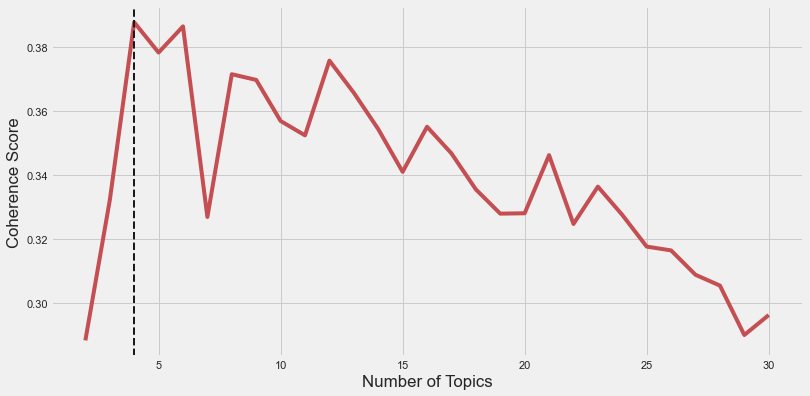

In [76]:
plt.style.use('fivethirtyeight')

x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axvline(x=4, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')
#plt.axvline((three_down), color='g', linewidth=2)

**Visually confirmed; we will use that** going forwards.

Let's see what **4** topics looks like with pyLDAvis.

In [77]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=4,    # the best result from the coherence_score
                                           random_state=100, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


In [78]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.372852  0.105650  1       1        30.316386
0      0.114933  0.350745  2       1        26.680615
2      0.357562 -0.116802  3       1        25.745640
1     -0.099643 -0.339592  4       1        17.257358, topic_info=          Term          Freq         Total Category  logprob  loglift
265   police    29988.000000  29988.000000  Default  30.0000  30.0000
6     hong      25181.000000  25181.000000  Default  29.0000  29.0000
7     kong      23998.000000  23998.000000  Default  28.0000  28.0000
43    hk        16894.000000  16894.000000  Default  27.0000  27.0000
153   negative  14220.000000  14220.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
284   hate      1062.946698   1063.787075   Topic4  -5.2794   1.7561 
748   photo     1043.404507   1044.246998   Topic4  -5.2980   1.7561 
175   punish    1056.176601   1057.030909   Topic4  -5.2858   1.7561 
1581  head      1008.762026   1009.603554   Topic4  -5.3317   1.7561 
1125  too       1000.601540   1001.436425   Topic4  -5.3399   1.7561 

[153 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
191   2      0.999683  act    
483   3      0.999654  again  
129   1      0.999453  allow  
360   1      0.999390  als    
131   1      0.999905  arst   
...  ..           ...  ...    
108   4      0.999473  well   
1089  2      0.999819  why    
49    3      0.999829  with_hk
18    2      0.999885  world  
123   2      0.999894  year   

[126 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

After Coherence Score confirmation, the output is visually similar to the last round. We will outline what is seen:
   * The **sizes look to be reasonably similar**
   * The **distance between the center for all** circles **indicates they are distinct**
   * On the right side, **the top words & trigrams to be the following for each topic with supporting potential rational**:
     * **Topic 1** | police, arst, law & is_terrorist
       * The police may be going against the law & deemed as terrorists
     * **Topic 2** | negative, people, never, world & China
       * A notable use of profanity towards never doing something & reaching out to the world
         * We have confirmation from EDA that the usage of the word China here is mostly sarcasm
     * **Topic 3** | support, justice, evil, fight, truth & thank
       * Requests for support towards justice while giving thanks for their fight against evil for truth
     * **Topic 4** | need, time, protest & puppet
       * A request for time against puppets (potentially Carrie Lam)
         * The time mentioned here may be a reference to the Year 2047 when HK will officially be off the one party two systems structure


<a id='eda_words_in_t'></a>**Words in Topics** | Looking at which words dominate our new identified topics in a DataFrame.

In [79]:
best_model_idx = coherence_df[coherence_df['Number of Topics'] == 4].index[0]
best_lda_model = lda_models[best_model_idx]
print('As confirmed, we have',best_lda_model.num_topics,'topics.')

As confirmed, we have 4 topics.


In [350]:
topics = [[(term, round(wt, 3)) 
               for term, wt in best_lda_model.show_topic(n, topn=20)] 
                   for n in range(0, best_lda_model.num_topics)]

topics_df = pd.DataFrame([[term for term, wt in topic] 
                              for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4
Term1,support,negative,hong,police
Term2,thank,never,kong,arst
Term3,stand,for,china,year
Term4,right,help,police,hk
Term5,fem,hker,law,people
Term6,hu,evil,people,chinese
Term7,world,world,fem,truth
Term8,fight,india,citizen,attack
Term9,hong,od,country,is_terrorist
Term10,watch,well,ccp,time


In [351]:
pd.set_option('display.max_colwidth', -1)
topics_df_side = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)]
                         )
topics_df_side

,Terms per Topic
Topic1,"support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope"
Topic2,"negative, never, for, help, hker, evil, world, india, od, well, is_terrorist, sanction, save, need, country_modern_slave, face, virus, big, young, talk"
Topic3,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment"
Topic4,"police, arst, year, hk, people, chinese, truth, attack, is_terrorist, time, think, terrorist, protest, stop, vernment, so, ccp, charge, peaceful, victim"


<a id='eda_top_dist'></a>**Topics Distribution** | Looking at the distribution of topic dominance in the DataFrame.

In [82]:
tm_results = best_lda_model[corpus]

In [83]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                 for topics in tm_results]
corpus_topics[:5]

[(0, 0.74768084),
 (2, 0.4262921),
 (2, 0.42627338),
 (3, 0.73171675),
 (2, 0.42629194)]

In [84]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(df_cluster))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Tweets'] = df_cluster['tweet']
corpus_topic_df = corpus_topic_df.drop(['Document'], axis=1)

In [85]:
corpus_topic_df.head()

,Dominant Topic,Contribution %,Topic Desc,Tweets
0,1,74.77,"support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope",thanks speaking us
1,3,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo
2,3,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo
3,4,73.17,"police, arst, year, hk, people, chinese, truth, attack, is_terrorist, time, think, terrorist, protest, stop, vernment, so, ccp, charge, peaceful, victim",war communism
4,3,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo


In [86]:
topic_stats = pd.DataFrame([])
topic_stats = corpus_topic_df.groupby(by=['Dominant Topic'])['Dominant Topic'].agg([("count")])
topic_stats = topic_stats.reset_index()
topic_stats.columns = ['Dominant Topic','# of Observations']
topic_stats['% of Observations'] = ( topic_stats['# of Observations'] / topic_stats['# of Observations'].sum() )

# pulling from another dataframe for terms
topics_l = pd.DataFrame([])
topics_l = pd.DataFrame([topics_df['Terms per Topic'].copy()]).T
topics_l.reset_index(inplace = True)
topics_l = topics_l.drop(['index'], axis=1)
topic_stats['Terms'] = topics_l['Terms per Topic']

In [87]:
topic_stats.head(9)

,Dominant Topic,# of Observations,% of Observations,Terms
0,1,57394,0.350609,"support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope"
1,2,20194,0.123361,"negative, never, for, help, hker, evil, world, india, od, well, is_terrorist, sanction, save, need, country_modern_slave, face, virus, big, young, talk"
2,3,45722,0.279307,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment"
3,4,40388,0.246723,"police, arst, year, hk, people, chinese, truth, attack, is_terrorist, time, think, terrorist, protest, stop, vernment, so, ccp, charge, peaceful, victim"


Text(0.5, 1.0, 'Looking at the % Contribution of Tweets within Topics')

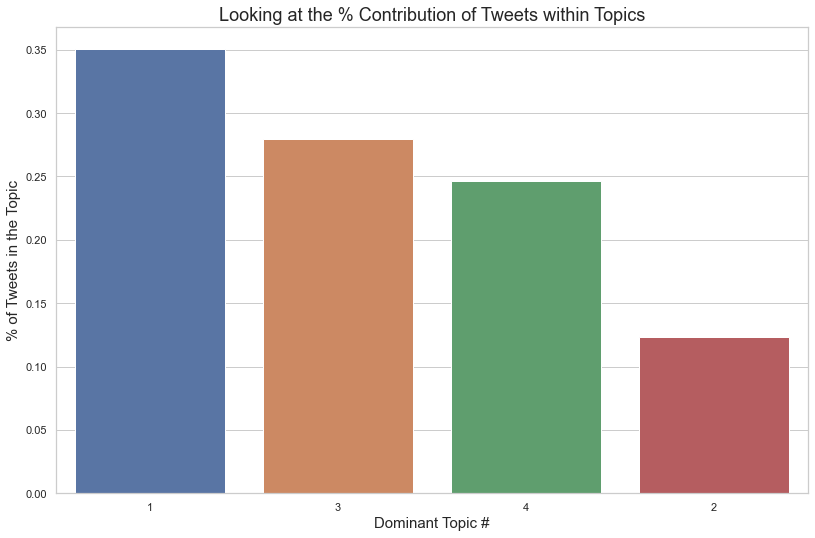

In [88]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
# clrs = ['grey' if (x < max(topic_stats['% of Observations'])) else 'red' for x in topic_stats['% of Observations'] ]
ax = sns.barplot(x="Dominant Topic", y="% of Observations", data=topic_stats,
                 order=topic_stats.sort_values('% of Observations',ascending = False)['Dominant Topic'])
plt.xlabel("Dominant Topic #", size=15)
plt.ylabel("% of Tweets in the Topic", size=15)
plt.title("Looking at the % Contribution of Tweets within Topics", size=18)

In [89]:
topic_stats.sort_values(by=['% of Observations'], ascending=False)

,Dominant Topic,# of Observations,% of Observations,Terms
0,1,57394,0.350609,"support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope"
2,3,45722,0.279307,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment"
3,4,40388,0.246723,"police, arst, year, hk, people, chinese, truth, attack, is_terrorist, time, think, terrorist, protest, stop, vernment, so, ccp, charge, peaceful, victim"
1,2,20194,0.123361,"negative, never, for, help, hker, evil, world, india, od, well, is_terrorist, sanction, save, need, country_modern_slave, face, virus, big, young, talk"


In [91]:
n = (topic_stats['% of Observations'][0]+topic_stats['% of Observations'][2]+topic_stats['% of Observations'][3]).sum()
print('It appears that',"{:,}%".format(round(n*100,0)),'of the Tweets fall into the Top 3 categories.')

It appears that 88.0% of the Tweets fall into the Top 3 categories.


**Topic Sentiment** | Taking a look at how the Sentiment of these 9 Topics played out.

In [92]:
topic_sent = pd.concat([corpus_topic_df,df_cluster['comp']],
                    axis = 1, ignore_index=False)

In [93]:
topic_sent.head(2)

,Dominant Topic,Contribution %,Topic Desc,Tweets,comp
0,1.0,74.77,"support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope",thanks speaking us,0.4404
1,3.0,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo,-0.2960


[Text(0.5, 0, 'Topics'), Text(0, 0.5, 'Sentiment Scores (Comp)')]

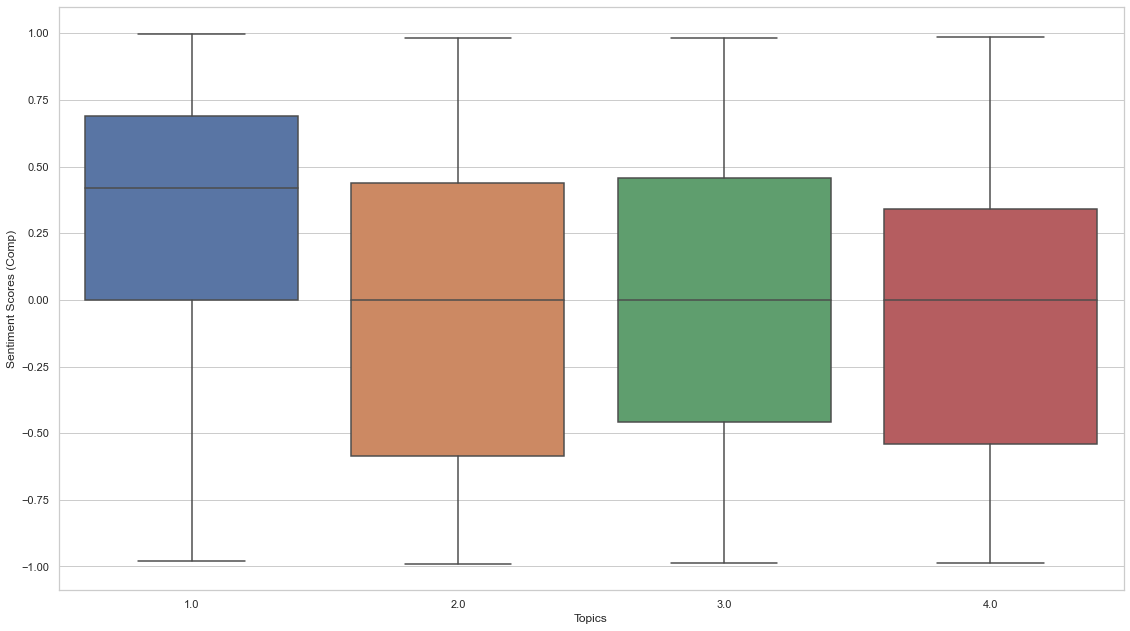

In [94]:
fig, ax = plt.subplots(1,1, figsize=(17,10))
ax = sns.boxplot(x="Dominant Topic", y="comp", data=topic_sent)
#ax.set(title='Comp Score ( Titles )')
ax.set(xlabel='Topics', ylabel='Sentiment Scores (Comp)')


We can see that the breakdown of Positive & Negative as:
   * Positive
     * Number 1

The rest appear Neutral. We will remind ourselves what the key words defining the Positive & Negative Topics are.

Let's take a look at the **Positive**:

In [95]:
print(
     ' Topic',topic_stats['Dominant Topic'][0],'|',topic_stats['Terms'][0])

 Topic 1 | support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope


Let's also take look at the others.

In [97]:
print(
     ' Topic',topic_stats['Dominant Topic'][2],'|',topic_stats['Terms'][2],'\n',
     'Topic',topic_stats['Dominant Topic'][3],'|',topic_stats['Terms'][3],'\n',
     'Topic',topic_stats['Dominant Topic'][1],'|',topic_stats['Terms'][1],'\n',
)

 Topic 3 | hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment 
 Topic 4 | police, arst, year, hk, people, chinese, truth, attack, is_terrorist, time, think, terrorist, protest, stop, vernment, so, ccp, charge, peaceful, victim 
 Topic 2 | negative, never, for, help, hker, evil, world, india, od, well, is_terrorist, sanction, save, need, country_modern_slave, face, virus, big, young, talk 



**Topics Distribution Summary** 
It appears that the **Positive** Topic Categories revolve around 
   * thanks for support, mentions of the world as well as freedom & democracy
   
The others revolve around:
   * China, the police & brutality
   * Police, attacks, terrorism & protests
   * Negative (the replacement word for profanity), evil, terrorism & sanctions

<a id='eda_between'></a>**Reading Between the Lines** | We will now manually take a closer look at each of the Topic Categories to ascertain what was officially Tweeted.

In [112]:
# setting up a new dataframe
c_topic_rbl_df = pd.DataFrame([])
c_topic_rbl_df = corpus_topic_df.copy()

In [124]:
# setting up dataframes for each of the four topics
c_topic_rbl_one = c_topic_rbl_df[(c_topic_rbl_df['Dominant Topic'] == 1)]
c_topic_rbl_two = c_topic_rbl_df[(c_topic_rbl_df['Dominant Topic'] == 2)]
c_topic_rbl_three = c_topic_rbl_df[(c_topic_rbl_df['Dominant Topic'] == 3)]
c_topic_rbl_four = c_topic_rbl_df[(c_topic_rbl_df['Dominant Topic'] == 4)]

Confirming it was set up correctly.

In [142]:
print('',c_topic_rbl_one['Dominant Topic'].unique(),'| Topic 1 Data frame unique values','\n',
     c_topic_rbl_two['Dominant Topic'].unique(),'| Topic 2 Data frame unique values','\n',
     c_topic_rbl_three['Dominant Topic'].unique(),'| Topic 3 Data frame unique values','\n',
     c_topic_rbl_four['Dominant Topic'].unique(),'| Topic 4 Data frame unique values','\n',
     )

 [1] | Topic 1 Data frame unique values 
 [2] | Topic 2 Data frame unique values 
 [3] | Topic 3 Data frame unique values 
 [4] | Topic 4 Data frame unique values 



<a id='eda_rdl_1'></a>**RBL Topic 1** | Reading between the lines.

In [195]:
c_topic_rbl_one.head(3)

,Dominant Topic,Contribution %,Topic Desc,Tweets
0,1,74.77,"support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope",thanks speaking us
14,1,67.05,"support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope",i proud honored called hong konger on revolution _with_hk _us _watch _hk
32,1,40.61,"support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope",i birthday soon july best gift me thanks


Text(0, 0.5, 'Count')

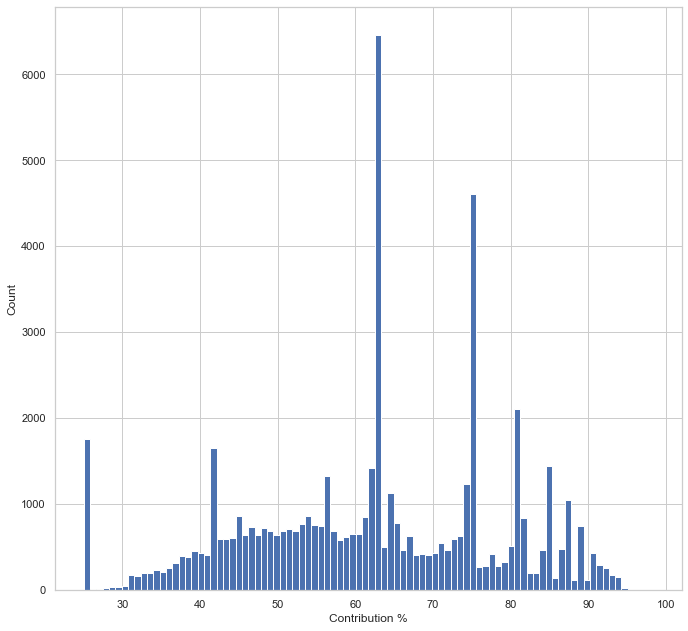

In [196]:
plt.figure(figsize=(10, 10))
plt.hist(c_topic_rbl_one['Contribution %'], bins=90)
plt.xlabel('Contribution %')
plt.ylabel('Count')
# plt.axvline(x=one_mean,linewidth=4, color='r')

In [155]:
c_topic_rbl_one.describe()

,Dominant Topic,Contribution %
count,57394.0,57394.000000
mean,1.0,62.095606
std,0.0,16.190216
min,1.0,25.000000
25%,1.0,50.410000
50%,1.0,62.500000
75%,1.0,74.950000
max,1.0,98.350000


**There's a lot to manually digest**; even if we looked at those above the 75% mark & below the 25% mark. **Let's manually knock it down to a digestable amount**.

In [267]:
# creating empty dataframes
c_topic_rbl_one_top = pd.DataFrame([])
c_topic_rbl_one_low = pd.DataFrame([])

# adjusting to a managable amount on the top & low side
c_topic_rbl_one_top = c_topic_rbl_one[(c_topic_rbl_one['Contribution %'] >= 94)]
c_topic_rbl_one_low = c_topic_rbl_one[(c_topic_rbl_one['Contribution %'] <= 26) & (c_topic_rbl_one['Contribution %'] > 25)]

In [268]:
print('We knocked it down to','\n',
      len(c_topic_rbl_one_top),'| on the top side','\n',
     len(c_topic_rbl_one_low), '| on the low side' )

We knocked it down to 
 70 | on the top side 
 10 | on the low side


**Top side** check.

In [271]:
c_topic_rbl_one_top['Tweets'].head(50)

4520      thank sir supporting hongkongers defending freedom humanrights hong kong defending core value free world please                                                                                                                                                                                      
5078      thank continuous great effort  thank ben joining speak hong kong we stand together freedom                                                                                                                                                                                                           
5116      thank ipac support  support democracy freedom we really appreciate continued strong support continue fight now we see strength unity enormous                                                                                                                                                        
5176      thank standing hong kong because continuous support antichina alliance stronge

**Bottom side** check.

In [258]:
c_topic_rbl_one_low['Tweets'].head(10)

32830      wonderful application make  dance together face_with_tears_of_joy face_with_tears_of_joy                                                                     
34241     please convince lobby uk follow suit thank you                                                                                                                
42609     thank much  disqualifying prodemocracy candidates strong support hkers trampling people from trend i afraid scale grow one day proccp politicians run election
51265     thanks  it really comforts encourages me warm                                                                                                                 
63091     its awesome thank encouragement vote                                                                                                                          
98159     thank you nice writing happy birthday                                                                                                            

**RBL Topic 1 : Summary** | Reading between the lines we see:
   * A notable amount of appreciation for support from the world for helping fight for freedom, democracy & human rights
   * Mentions of the free world which may be classified as the UK, Australia, Taiwan & the USA with personal mentions towards:
     * rep riggleman
     * sec pompeo
     * aderholt
     * rep gooden
     * sen haley

<a id='eda_rdl_2'></a>**RBL Topic 2** | Reading between the lines.

In [272]:
c_topic_rbl_two.head(3)

,Dominant Topic,Contribution %,Topic Desc,Tweets
6,2,44.49,"negative, never, for, help, hker, evil, world, india, od, well, is_terrorist, sanction, save, need, country_modern_slave, face, virus, big, young, talk",china never stop
8,2,48.16,"negative, never, for, help, hker, evil, world, india, od, well, is_terrorist, sanction, save, need, country_modern_slave, face, virus, big, young, talk",_jpn thank japan brother sister
23,2,56.03,"negative, never, for, help, hker, evil, world, india, od, well, is_terrorist, sanction, save, need, country_modern_slave, face, virus, big, young, talk",we condemn bolton well


Text(0, 0.5, 'Count')

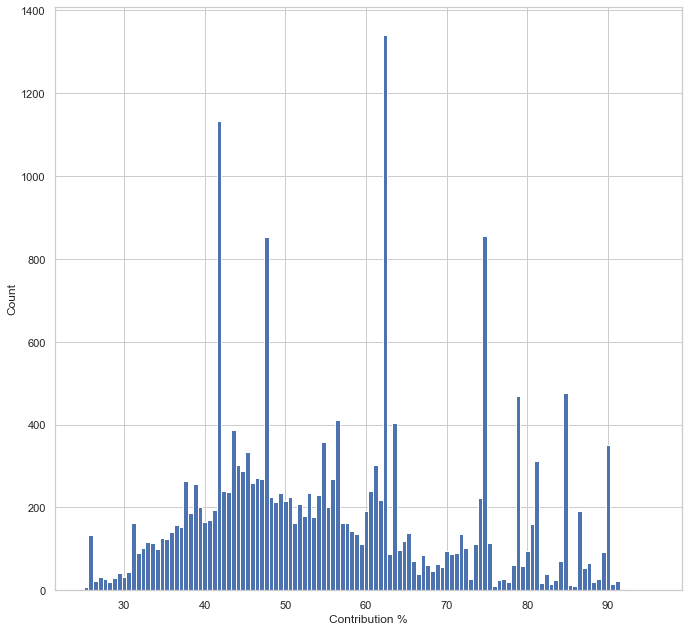

In [296]:
plt.figure(figsize=(10, 10))
plt.hist(c_topic_rbl_two['Contribution %'], bins=120)
plt.xlabel('Contribution %')
plt.ylabel('Count')
# plt.axvline(x=one_mean,linewidth=4, color='r')

In [ ]:
c_topic_rbl_two.describe()

**There's a lot to manually digest**; even if we looked at those above the 75% mark & below the 25% mark. **Let's manually knock it down to a digestable amount**.

In [294]:
# creating empty dataframes
c_topic_rbl_two_top = pd.DataFrame([])
c_topic_rbl_two_low = pd.DataFrame([])

# adjusting to a managable amount on the top & low side
c_topic_rbl_two_top = c_topic_rbl_two[(c_topic_rbl_two['Contribution %'] >= 90)]
c_topic_rbl_two_low = c_topic_rbl_two[(c_topic_rbl_two['Contribution %'] <= 25.72)]

In [295]:
print('We knocked it down to','\n',
      len(c_topic_rbl_two_top),'| on the top side','\n',
     len(c_topic_rbl_two_low), '| on the low side' )

We knocked it down to 
 47 | on the top side 
 17 | on the low side


**Top side** check.

In [300]:
c_topic_rbl_two_top['Tweets'].tail(50)

3766      i pray everyday safe return i wish someone could help them folded_hands folded_hands folded_hands crying_face crying_face crying_face loudly_crying_face loudly_crying_face loudly_crying_face broken_heart broken_heart broken_heart  _is_terrorist                                                                                                                                                                                                                                                         
4964      _hker help kids pls no matter evil    no matter brutal   still fighting justice liberty amp democracy pouting_face  giving up                                                                                                                                                                                                                                                                                                                                                                         

**Bottom side** check.

In [299]:
c_topic_rbl_two_low['Tweets'].head(20)

59        corrupt league                  _gb                
125       sponsor corruption          _gb                    
3321      damnnnnnn                                          
3404      we like idea using tag plural stuff                
5197      a tragical day                                     
5997      thank mr manly mp                                  
13431     tahnk much                                         
23117     _espanol please                                    
23120     _heide please                                      
23413     _espanol please                                    
34180     ohits happening                                    
44037     chinesestyle elections                             
44169      legco election candidates disqualified            
51428      wowthank                                          
64240     thank aus quick response                           
72871     this thoughtcrime                                  
116383  

**RBL Topic 2 : Summary** | Reading between the lines we see:
   * A sense of comradery towards their fight 
   * Conveying a urge to not give up on their fight
   * The usage of positivity to achieve the aforementioned goals:
     * candle
     * musical_notes / sing hallelujah
     * folded_hands
     * Different configurations of people holding hands

<a id='eda_rdl_3'></a>**RBL Topic 3** | Reading between the lines.

In [301]:
c_topic_rbl_three.head(3)

,Dominant Topic,Contribution %,Topic Desc,Tweets
1,3,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo
2,3,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo
4,3,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo


Text(0, 0.5, 'Count')

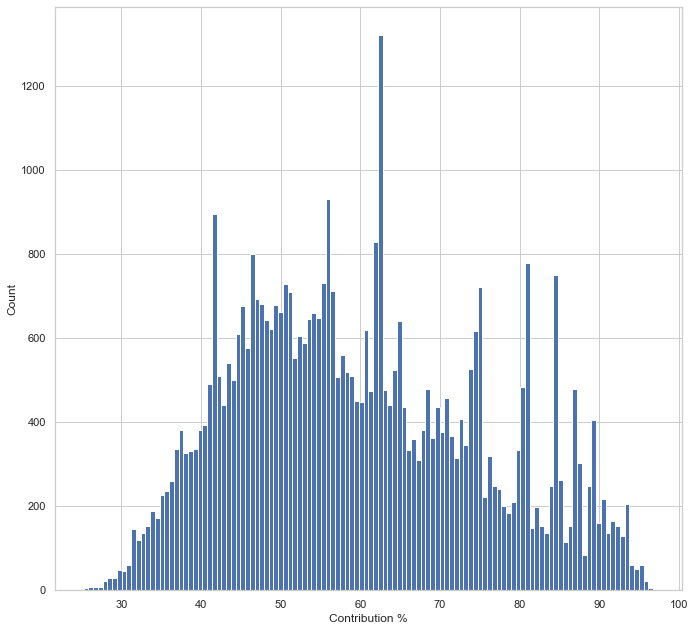

In [302]:
plt.figure(figsize=(10, 10))
plt.hist(c_topic_rbl_three['Contribution %'], bins=120)
plt.xlabel('Contribution %')
plt.ylabel('Count')
# plt.axvline(x=one_mean,linewidth=4, color='r')

In [303]:
c_topic_rbl_three.describe()

,Dominant Topic,Contribution %
count,45722.0,45722.000000
mean,3.0,59.831997
std,0.0,15.441896
min,3.0,25.250000
25%,3.0,47.572500
50%,3.0,57.890000
75%,3.0,71.350000
max,3.0,96.760000


This distribution is more "normally distributed. Nevertheless, even if we looked at those above the 75% mark & below the 25% mark. **Let's manually knock it down to a digestable amount**.

In [326]:
# creating empty dataframes
c_topic_rbl_three_top = pd.DataFrame([])
c_topic_rbl_three_low = pd.DataFrame([])

# adjusting to a managable amount on the top & low side
c_topic_rbl_three_top = c_topic_rbl_three[(c_topic_rbl_three['Contribution %'] >= 95.25)]
c_topic_rbl_three_low = c_topic_rbl_three[(c_topic_rbl_three['Contribution %'] <= 27)]

In [327]:
print('We knocked it down to','\n',
      len(c_topic_rbl_three_top),'| on the top side','\n',
     len(c_topic_rbl_three_low), '| on the low side' )

We knocked it down to 
 63 | on the top side 
 21 | on the low side


**Top side** check.

In [332]:
c_topic_rbl_three_top['Tweets'].head(50)

328      us condemns arrest prodemocratic media tycoon jimmy lai asks china restore hong kongs rule law  indiablooms  first portal digital news management      jimmy lai                                                  
2137        hong kong police definitely rubbish totally control hold weapon hong kong longer safe city hong kong country seeking freedom                                                                                   
12062    hk gov shows china style rule law is law weapon suppress prodemocracy camp law  protect citizens equality law joke no justice hong kong anymore                                                                   
21203    it end it obviously political prosecution ccp adopting strong strategies silence opposition voices undermine hong kongs democracy amp rule law  tool ccp arrest prodemocracy people please                        
25833    _hk ccp uses  suppress press freedom hong kong hk police puppet political tool ccp only dictatorial regime woul

**Bottom side** check.

In [333]:
c_topic_rbl_three_low['Tweets'].head(22)

42075     negative gt  horse rode on the chinese people deserve government good great   thugs zhongnanhai to   stand freedom  wherever rules                                                        
42971     insufferable                                                                                                                                                                              
45467     i cant help look contrasts  brave young  arrested their crime demonstrating democracy freedom while americans burn freedom ground                                                         
50795     _eeas thank   friends europe                                                                                                                                                              
50819     hahaha thank giving us answer united states well done                                                                                                                                     
58117     negat

**RBL Topic 3 : Summary** | Reading between the lines we see:
   * Tweeters vocalize their negative opinion towards what they believe China's goal is; notably:
     * Treat HK the way the believe China treats Tibet & the Uighurs
     * Limitations towards freedom & Press Freedom
     * The suppression of democracy
     * Political suppression via arresting protestors
     * Authoritarian rule & tyranny
   * Belief that the HK police are puppets

<a id='eda_rdl_4'></a>**RBL Topic 4** | Reading between the lines.

In [334]:
c_topic_rbl_four.head(3)

,Dominant Topic,Contribution %,Topic Desc,Tweets
3,4,73.17,"police, arst, year, hk, people, chinese, truth, attack, is_terrorist, time, think, terrorist, protest, stop, vernment, so, ccp, charge, peaceful, victim",war communism
7,4,37.29,"police, arst, year, hk, people, chinese, truth, attack, is_terrorist, time, think, terrorist, protest, stop, vernment, so, ccp, charge, peaceful, victim",china want dominate world get report here
10,4,61.91,"police, arst, year, hk, people, chinese, truth, attack, is_terrorist, time, think, terrorist, protest, stop, vernment, so, ccp, charge, peaceful, victim",no chinese


Text(0, 0.5, 'Count')

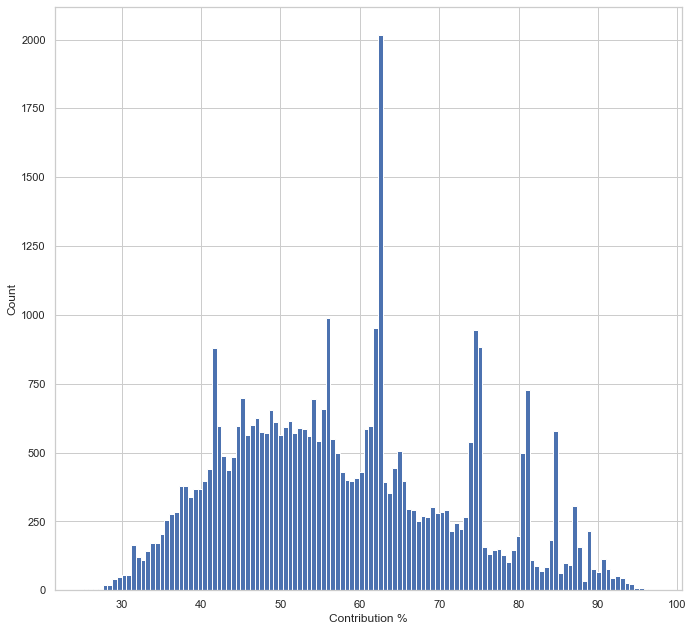

In [335]:
plt.figure(figsize=(10, 10))
plt.hist(c_topic_rbl_four['Contribution %'], bins=120)
plt.xlabel('Contribution %')
plt.ylabel('Count')
# plt.axvline(x=one_mean,linewidth=4, color='r')

In [336]:
c_topic_rbl_four.describe()

,Dominant Topic,Contribution %
count,40388.0,40388.000000
mean,4.0,57.960684
std,0.0,14.365390
min,4.0,25.220000
25%,4.0,46.670000
50%,4.0,56.340000
75%,4.0,67.510000
max,4.0,96.950000


**There's a lot to manually digest even though that also looks normally distributed**; even if we looked at those above the 75% mark & below the 25% mark. **Let's manually knock it down to a digestable amount**.

In [345]:
# creating empty dataframes
c_topic_rbl_four_top = pd.DataFrame([])
c_topic_rbl_four_low = pd.DataFrame([])

# adjusting to a managable amount on the top & low side
c_topic_rbl_four_top = c_topic_rbl_four[(c_topic_rbl_four['Contribution %'] >= 93.5)]
c_topic_rbl_four_low = c_topic_rbl_four[(c_topic_rbl_four['Contribution %'] <= 28)]

In [346]:
print('We knocked it down to','\n',
      len(c_topic_rbl_four_top),'| on the top side','\n',
     len(c_topic_rbl_four_low), '| on the low side' )

We knocked it down to 
 75 | on the top side 
 28 | on the low side


**Top side** check.

In [347]:
c_topic_rbl_four_top['Tweets'].head(50)

180       victim criminal on  august   arrested related  yuen long attack protest tuen mun july  including  prodemocracy legistlators journalist                                                                                                
566       roger fisher wrote getting yes amp said separate people problem focus interests positions cant build online forums that we start brainstorming likely shared opposing interest conflict                                               
567       _thaler roger fisher wrote getting yes amp said separate people problem focus interests positions cant build online forums that we start brainstorming likely shared opposing interest conflict                                       
591       trying hard avoid officially locking city the idea carrie lam refuses give style twisted ideas words just like responded antielab                                                                                                     
822        protester burned flag  re

**Bottom side** check.

In [348]:
c_topic_rbl_four_low['Tweets'].head(30)

5193      thank you friends tokyo boycott chinese products really useful cut source income china because continuous support antichina alliance stronger ever                       
26326     nice how british nationals torturing  protesters face punishment home thats right role model children rupert dover david jordan trial first they shame british           
34240     this great news   we wont forget thank much act in addition i would like credit frontline protesters                                                                     
46662     some things simply remind goddesses therefighting good fight amp every day                                                                                               
55129      cannot negative us all idea bullet proof                                                                                                                                
61978     exercise possibly right last vote                                                         

**RBL Topic 4 : Summary** | Reading between the lines we see:
   * Confrontations with the police with notable mentions of:
     * People being arrested & sentenced
     * Hurting police with a laser pointer
     * Beatings at 
       * Prince Edward Station
       * Mong Kok
       * Causeway Bay
       * Tseung Kwan
     * Assaulting a police officer by kicking their back
     * A lady carring a US flag in a shopping mall
     * Possession of kg ketamine
   * Confrontations with legal authorities with charges of:
     * Attempting to split the nation with posts on Facebook
     * Banning of books
     * Possession of a flick knife deemed to be an offensive weapon
     * Gatherings banned
       * Mentions of the Tiananmen Massacre 
     * A judge sentenced an old teacher for assaulting police
   * Belief that China is working with the Triads to form a "Chinese secret police"
   * The protestors belief that the media confuses their intentions
     * they believe they aren't asking for violence; they are asking for justice & the protests are one way to vocalize this intent for making a change


**RBL All Topics : Initial Summary** | To reiterate & place them in one place side by side, the reading between the lines on all are as below:
   * **Topic 1**
     * A notable amount of appreciation for support from the world for helping fight for freedom, democracy & human rights
     * Mentions of the free world which may be classified as the UK, Australia, Taiwan & the USA with personal mentions towards:
       * rep riggleman
       * sec pompeo
       * aderholt
       * rep gooden
       * sen haley
   * **Topic 2**
     * A sense of comradery towards their fight 
     * Conveying a urge to not give up on their fight
     * The usage of positivity to achieve the aforementioned goals:
       * candle
       * musical_notes / sing hallelujah
       * folded_hands
       * Different configurations of people holding hands
   * **Topic 3**
     * Tweeters vocalize their negative opinion towards what they believe China's goal is; notably:
       * Treat HK the way the believe China treats Tibet & the Uighurs
       * Limitations towards freedom & Press Freedom
       * The suppression of democracy
       * Political suppression via arresting protestors
       * Authoritarian rule & tyranny
     * Belief that the HK police are puppets
   * **Topic 4**
     * Confrontations with the police with notable mentions of:
       * People being arrested & sentenced
       * Hurting police with a laser pointer
       * Beatings at 
         * Prince Edward Station
         * Mong Kok
         * Causeway Bay
         * Tseung Kwan
       * Assaulting a police officer by kicking their back
       * A lady carring a US flag in a shopping mall
       * Possession of kg ketamine
     * Confrontations with legal authorities with charges of:
       * Attempting to split the nation with posts on Facebook
       * Banning of books
       * Possession of a flick knife deemed to be an offensive weapon
       * Gatherings banned
         * Mentions of the Tiananmen Massacre 
       * A judge sentenced an old teacher for assaulting police
     * Belief that China is working with the Triads to form a "Chinese secret police"
     * The protestors belief that the media confuses their intentions
       * they believe they aren't asking for violence; they are asking for justice & the protests are one way to vocalize this intent for making a change


You may slowly read both the Tweets in their respective sections & the above. I hope that you believe I am using my objective judgement when I rename the columns to new Column names but before I do so I will explain them each:
   * **Topic 1** | A notable amount of appreciation for support from the free world for helping fight for freedom, democracy & human rights
   * **Topic 2** | A sense of comradery towards their fight & urges to not give up
   * **Topic 3** | Tweeters vocalize their negative opinion towards what they believe China's goal is
   * **Topic 4** | Confrontations with the police & HK legal authorities

I will now change the names of the columns to the below:
   * **Topic 1** --> support
   * **Topic 2** --> comradery
   * **Topic 3** --> china_opinion
   * **Topic 4** --> hk_govt

Let's rename.

In [353]:
topics_df.columns = ['support','comradery','china_opinion','hk_govt'] 
topics_df

,support,comradery,china_opinion,hk_govt
Term1,support,negative,hong,police
Term2,thank,never,kong,arst
Term3,stand,for,china,year
Term4,right,help,police,hk
Term5,fem,hker,law,people
Term6,hu,evil,people,chinese
Term7,world,world,fem,truth
Term8,fight,india,citizen,attack
Term9,hong,od,country,is_terrorist
Term10,watch,well,ccp,time


**RBL All Topics : Initial Review** | Let's take one last look at how the Topics stack up with names rather than numbers.

In [372]:
topic_sent.head(7)

,Dominant Topic,Contribution %,Topic Desc,Tweets,comp
0,1.0,74.77,"support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope",thanks speaking us,0.4404
1,3.0,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo,-0.2960
2,3.0,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo,-0.2960
3,4.0,73.17,"police, arst, year, hk, people, chinese, truth, attack, is_terrorist, time, think, terrorist, protest, stop, vernment, so, ccp, charge, peaceful, victim",war communism,-0.5994
4,3.0,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo,-0.2960
5,3.0,53.86,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",read report today how stop china hong kong,-0.2960
6,2.0,44.49,"negative, never, for, help, hker, evil, world, india, od, well, is_terrorist, sanction, save, need, country_modern_slave, face, virus, big, young, talk",china never stop,0.2235


In [393]:
topic_sent_rev = topic_sent.copy()

We will change the names to their respective new names.

In [394]:
topic_sent_rev['Dominant Topic'].replace(1.0, 
           "support", 
           inplace=True)

topic_sent_rev['Dominant Topic'].replace(2.0, 
           "comradery", 
           inplace=True)

topic_sent_rev['Dominant Topic'].replace(3.0, 
           "china_opinion", 
           inplace=True)

topic_sent_rev['Dominant Topic'].replace(4.0, 
           "hk_govt", 
           inplace=True)

In [395]:
topic_sent_rev.head(7)

,Dominant Topic,Contribution %,Topic Desc,Tweets,comp
0,support,74.77,"support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope",thanks speaking us,0.4404
1,china_opinion,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo,-0.2960
2,china_opinion,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo,-0.2960
3,hk_govt,73.17,"police, arst, year, hk, people, chinese, truth, attack, is_terrorist, time, think, terrorist, protest, stop, vernment, so, ccp, charge, peaceful, victim",war communism,-0.5994
4,china_opinion,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china hong kong read new report danish think tank cipo,-0.2960
5,china_opinion,53.86,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",read report today how stop china hong kong,-0.2960
6,comradery,44.49,"negative, never, for, help, hker, evil, world, india, od, well, is_terrorist, sanction, save, need, country_modern_slave, face, virus, big, young, talk",china never stop,0.2235


[Text(0.5, 0, 'Topics'), Text(0, 0.5, 'Sentiment Scores (Comp)')]

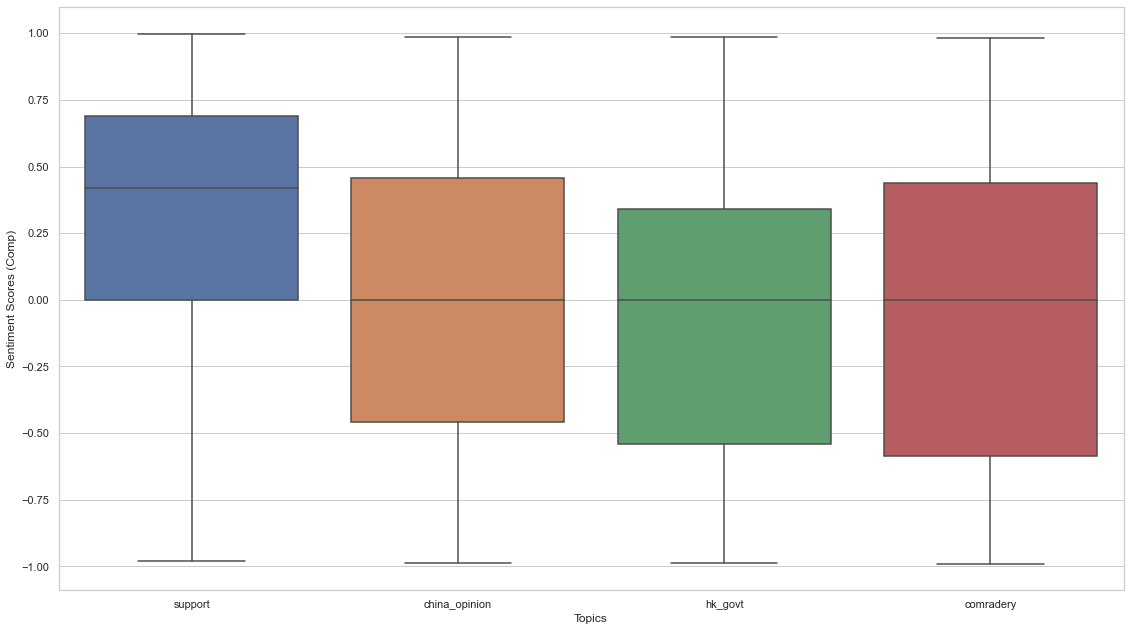

In [396]:
fig, ax = plt.subplots(1,1, figsize=(17,10))
ax = sns.boxplot(x="Dominant Topic", y="comp", data=topic_sent_rev)
#ax.set(title='Comp Score ( Titles )')
ax.set(xlabel='Topics', ylabel='Sentiment Scores (Comp)')


That looks to be & should be the same as before; i.e. half are neutral. **Let's take a look at the dominate words in each.**

In [397]:
topics_df

,support,comradery,china_opinion,hk_govt
Term1,support,negative,hong,police
Term2,thank,never,kong,arst
Term3,stand,for,china,year
Term4,right,help,police,hk
Term5,fem,hker,law,people
Term6,hu,evil,people,chinese
Term7,world,world,fem,truth
Term8,fight,india,citizen,attack
Term9,hong,od,country,is_terrorist
Term10,watch,well,ccp,time


My new thoughts on each below:
   * **support** | Support does have the Highest Sentiment Score for obvious reasons. There are words there I don't believe mean much; listed below:
     * fem, hu, kong, fe & hongkonger
   * **comradery** | Neutral & the word negative is the highest & I don't believe thats directed at themselves; additionally, words I don't believe mean much; listed below:
     * hker, od & young
   * **china_opinion** | Neutral & the words I don't believe mean much:
     * hong, kong, fem, hk, pss & fe
   * **hk_govt** | Neutral & the words I don't believe mean much:
     * people & so

We will remove these words & see how the scoring plays out. We will first drop the previous score.

In [398]:
topic_sent_rev = topic_sent_rev.drop(['comp'], axis=1)

In [399]:
topic_sent_rev.columns

Index(['Dominant Topic', 'Contribution %', 'Topic Desc', 'Tweets'], dtype='object')

We will identify a row which has a word to drop for reference.

In [400]:
topic_sent_rev['Tweets'][5]

'read report today how stop china hong kong            '

For additional reference, that Tweet falls into the following category.

In [401]:
topic_sent_rev['Dominant Topic'][5]

'china_opinion'

Removing the selected words from above.

In [402]:
topic_sent_rev['Tweets'] = topic_sent_rev['Tweets'].str.replace('fem|hu|kong|fe|hongkonger|hker|od|young|hong|kong|fem|hk|pss|fe|people|so','')

In [403]:
topic_sent_rev['Tweets'][5]

'read report tay how stop china              '

<a id='sia'></a>**Sentiment Intensity Analyzer |** Not perfect but here we will score the tweets based the words they used; sometimes call ' opinion mining'.

In [404]:
analyzer = SentimentIntensityAnalyzer()

We will first check for null values.

In [415]:
topic_sent_rev.isnull().sum()

Dominant Topic    1
Contribution %    1
Topic Desc        1
Tweets            2
dtype: int64

In [416]:
print('We have one which we will drop. Although this will have an impact on the outcome, it represents',
     "{:,}%".format(round(((5/len(topic_sent_rev))*100),5)),'of the total data frame.')

We have one which we will drop. Although this will have an impact on the outcome, it represents 0.00305% of the total data frame.


In [418]:
topic_sent_rev = topic_sent_rev.dropna()

In [419]:
topic_sent_rev.isnull().sum()

Dominant Topic    0
Contribution %    0
Topic Desc        0
Tweets            0
dtype: int64

Now the Sentiment Scoring.

In [420]:
#We will assign the tweets to a new dataframe & then put it back to the main one at the end
df_sentiment_tweet = pd.DataFrame(topic_sent_rev['Tweets'].copy())
df_sentiment_tweet['comp'] = [analyzer.polarity_scores(x)['compound'] for x in df_sentiment_tweet['Tweets']]
df_sentiment_tweet['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_sentiment_tweet['Tweets']]
df_sentiment_tweet['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_sentiment_tweet['Tweets']]
df_sentiment_tweet['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_sentiment_tweet['Tweets']]

Setting up for the pull in & then pulling it.

In [422]:
df_sentiment_tweet.columns

Index(['Tweets', 'comp', 'neg', 'neu', 'pos'], dtype='object')

In [423]:
df_sentiment_tweet = df_sentiment_tweet.drop(columns=['Tweets'])

In [424]:
topic_sent_rev_twice = pd.concat([topic_sent_rev, df_sentiment_tweet], axis=1)
# df = df.drop(columns = ['key_0'], axis=1)

In [426]:
topic_sent_rev_twice.head(3)

,Dominant Topic,Contribution %,Topic Desc,Tweets,comp,neg,neu,pos
0,support,74.77,"support, thank, stand, right, fem, hu, world, fight, hong, watch, kong, democracy, fe, shame, people, hongkonger, never, justice, is_terrorist, hope",thanks speaking us,0.4404,0.000,0.408,0.592
1,china_opinion,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china read new report danish think tank cipo,-0.2960,0.196,0.804,0.000
2,china_opinion,42.63,"hong, kong, china, police, law, people, fem, citizen, country, ccp, hk, arst, world, brutality, rule, pss, fe, national_security, new, vernment",how stop china read new report danish think tank cipo,-0.2960,0.196,0.804,0.000


Now to take a look.

[Text(0.5, 0, 'Topics'), Text(0, 0.5, 'Sentiment Scores (Comp)')]

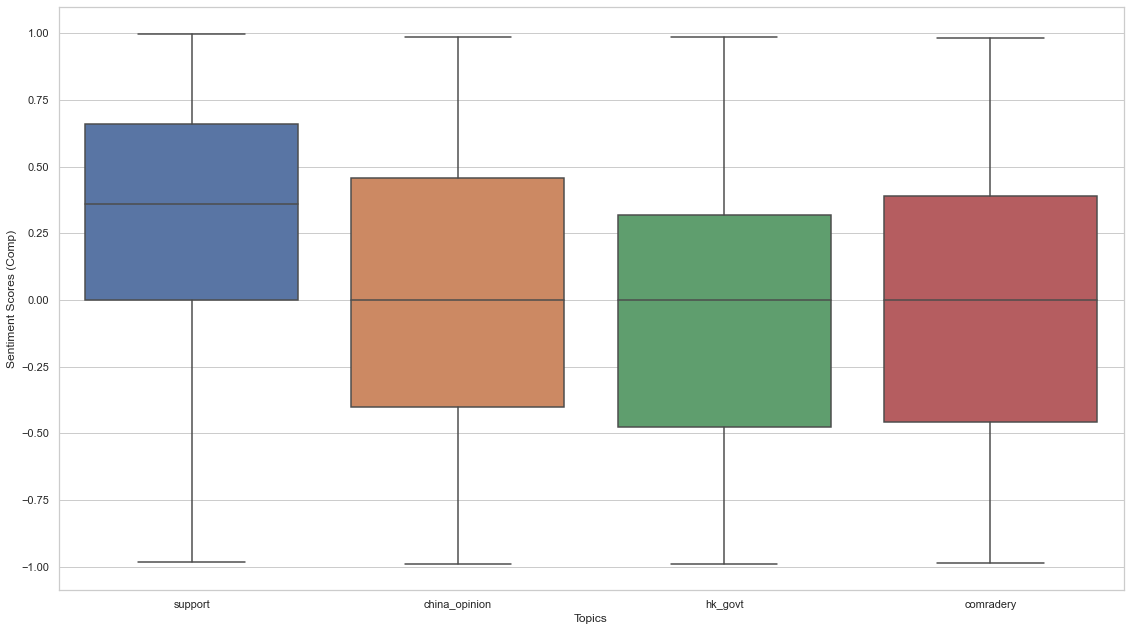

In [427]:
fig, ax = plt.subplots(1,1, figsize=(17,10))
ax = sns.boxplot(x="Dominant Topic", y="comp", data=topic_sent_rev_twice)
#ax.set(title='Comp Score ( Titles )')
ax.set(xlabel='Topics', ylabel='Sentiment Scores (Comp)')

Same. We will settle with this.

# **5.3 Project Summary**<a id='p_summary'></a>

We will first run over **the process undertaken** & **high-level findings**:
   * Reviewed the Skewness of the Sentiment Analysis
     * Gained initial suggestions to review the Tweet population's position on the law or something associated with it 
   * Investigated a potential progression of the Sentiment on a Time Series
     * Movements towards Positivity was seen in late-June & early August while movements towards Negativity was seen in late August
   * Looked a Bigrams of words used in the Positive & Negative Categories & the breakdown towards the below
     * Positivity | Thanks much / support, Free World, help & folded_hands ( 🙏 )
     * Negativity | Evil CCP, Police Brutality, Fighting & Holdings Hands ( 👬 )
     * Mentioned in both | Human Rights & freedom press / democracy
     * There appears to be a Pro-China or Pro-HK split.
   * Investigated links to geopolitical entities as well as potential sarcasm directed towards them
     * Positive mentions to the US while mentions towards China may be sarcastic
   * Identified the optimal number of topics discussed on the Tweets to be 4 & reviewed the extremes of them
     * A Positive & Negative Split between Thanks for support towards freedom & fighting respectively.
   * We took a deeper manual look at the 4 Topics & decided they can be classified as:
     * **support** | A notable amount of appreciation for support from the free world for helping fight for freedom, democracy & human rights
     * **comradery** | A sense of comradery towards their fight & urges to not give up
     * **china_opinion** | Tweeters vocalize their negative opinion towards what they believe China's goal is
     * **hk_govt** | Confrontations with the police & HK legal authorities


**We will end on it all together in a few sentences:**
   * Tweeters fall into four (4) categories; those categories being: 
     * #1 appreciation for the support coming from abroad
     * #2 comradery towards their fight against the law & perceived ramifications of it
     * #3 distrust towards China & their perceived intentions for the law
     * #4 dissatisfaction of how the police & the HK gov't are handling it
   * Tweeters believe that China will one day treat HK in a way similar to Tibet, Xinjiang (the Uighurs) & the Tiananmen Massacre; which they don't speak positively about. To overcome this perceived risk, they appreciate the support of the free world, which was deemed to include the UK, Australia, Taiwan & the USA. The Tweeters believe they should ban together in unity to overcome this perceived risk.

Please note, this Data Science project was completed in July 2021 but the data is from June - Aug 2020. Much may have changed but that would fall outside the scope of this project.